Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

> * The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

> * The second subplot will be a bar plot showing the net effect this had monthly, using resample().

> * Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

> * Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
quakes = pd.read_csv("earthquakes-1.csv")
fb = pd.read_csv("fb_stock_prices_2018.csv")
fb['date'] = pd.to_datetime(fb['date'])
fb.set_index('date', inplace=True)

[Text(0.5, 1.0, 'Rolling 20-Day Minimum of Facebook Closing Price'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Closing Price')]

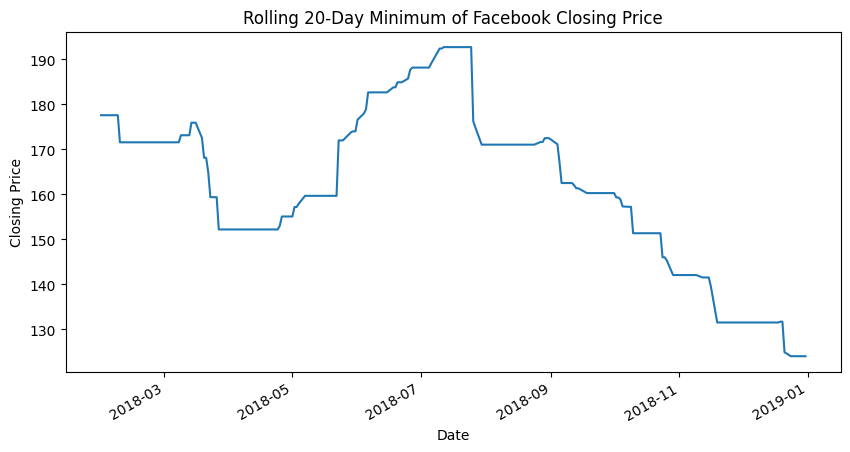

In [31]:
# Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.
plt.figure(figsize=(10, 5))
ax = fb['close'].rolling(window=20).min().plot()
ax.set(title = ('Rolling 20-Day Minimum of Facebook Closing Price'),
       xlabel = ('Date'),
       ylabel = ('Closing Price')
       )

[Text(0.5, 1.0, 'Histogram and KDE of Price Change from Open to Close'),
 Text(0.5, 0, 'Price Change'),
 Text(0, 0.5, 'Frequency')]

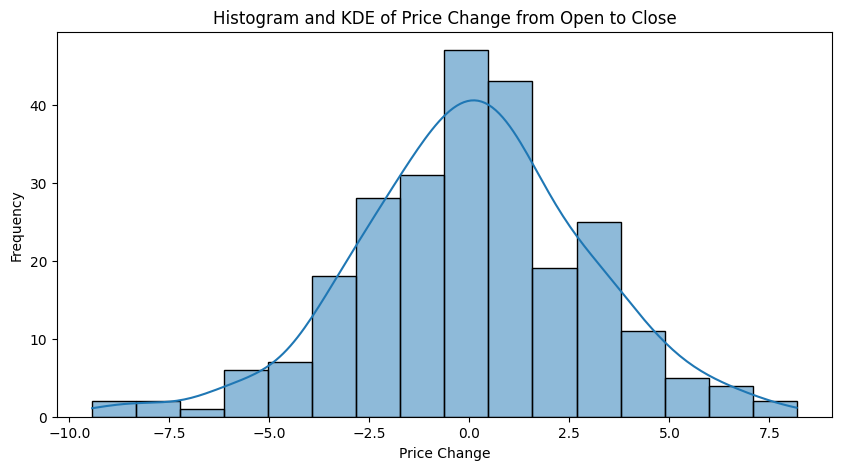

In [32]:
# Create a histogram and KDE of the change from open to close in the price of Facebook stock.
plt.figure(figsize=(10, 5))
ax = sns.histplot(fb['close'] - fb['open'], kde=True)
ax.set(title = ('Histogram and KDE of Price Change from Open to Close'),
       xlabel = ('Price Change'),
       ylabel = ('Frequency')
        )


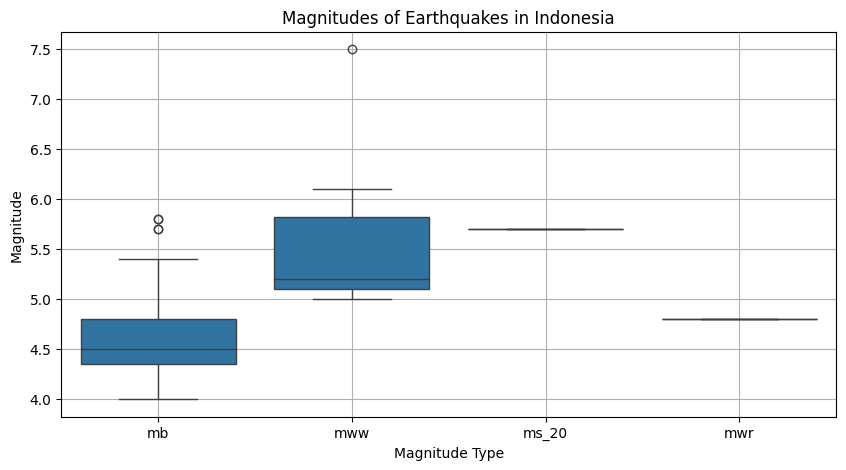

In [35]:
# Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.
indo = quakes[quakes['parsed_place'] == 'Indonesia']
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='magType', y='mag', data=indo)
ax.set(title='Magnitudes of Earthquakes in Indonesia',
       xlabel='Magnitude Type',
       ylabel='Magnitude')
ax.grid(True)

Text(0, 0.5, 'Price Difference')

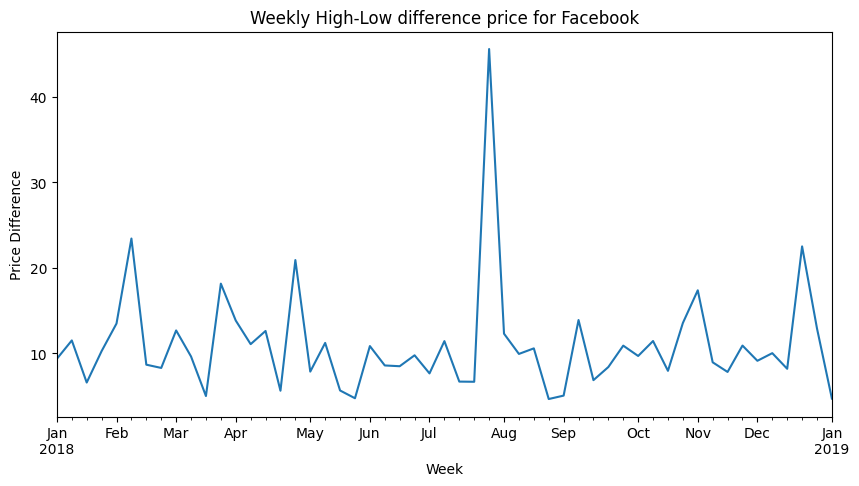

In [12]:
# Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.
weekly_high_low_diff = fb.groupby(pd.Grouper(freq='W')).agg({'high': 'max', 'low': 'min'})
weekly_high_low_diff['price_diff'] = weekly_high_low_diff['high'] - weekly_high_low_diff['low']
plt.figure(figsize=(10, 5))
weekly_high_low_diff['price_diff'].plot()
plt.title('Weekly High-Low difference price for Facebook')
plt.xlabel('Week')
plt.ylabel('Price Difference')

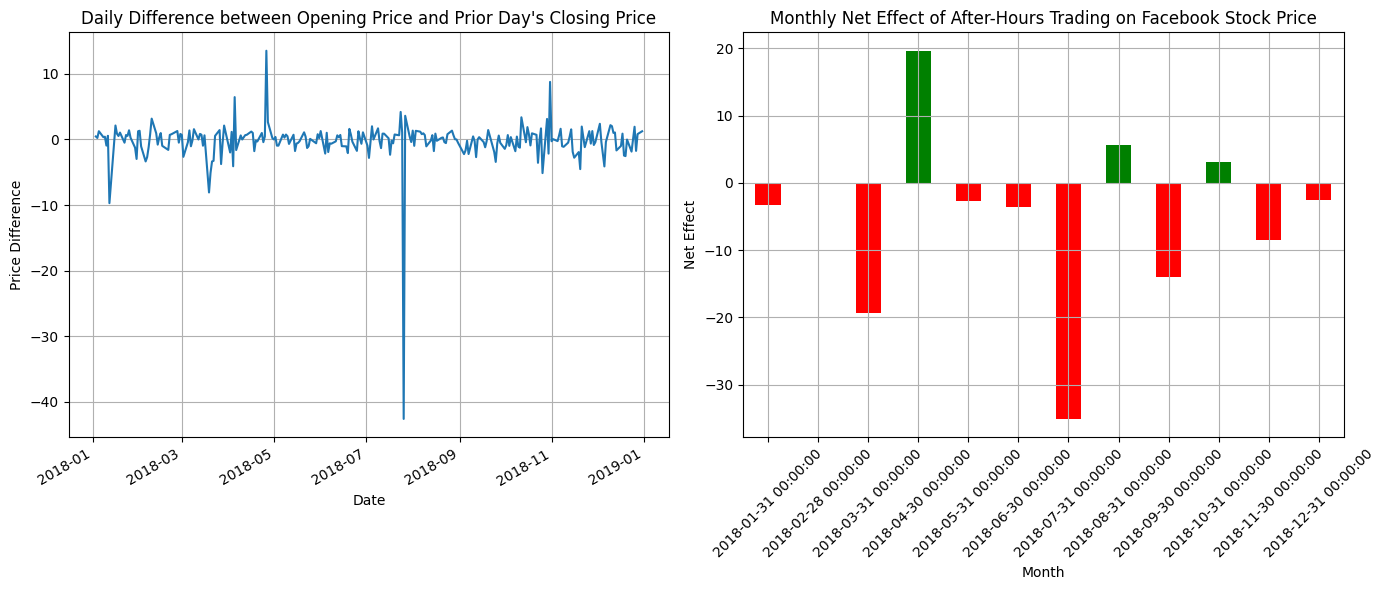

In [26]:
# Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price
fb['prior_day_close'] = fb['close'].shift(1)
fb['after_hours_effect'] = fb['open'] - fb['prior_day_close']
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
fb['after_hours_effect'].plot()
plt.title('Daily Difference between Opening Price and Prior Day\'s Closing Price')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
monthly_net_effect = fb.resample('M').sum()['after_hours_effect']
plt.subplot(1, 2, 2)
monthly_net_effect.plot(kind='bar', color=(monthly_net_effect > 0).map({True: 'g', False: 'r'}))
plt.title('Monthly Net Effect of After-Hours Trading on Facebook Stock Price')
plt.xlabel('Month')
plt.ylabel('Net Effect')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()